In [1]:
!pip install matplotlib-venn
!pip install sns

  Preparing metadata (setup.py) ... done
  Created wheel for sns: filename=sns-0.1-py3-none-any.whl size=2639 sha256=18545276a9e8ce7a9982f0553e9245a8abe82f159ef0fad9b0fd56cc9a37bac9
  Stored in directory: /root/.cache/pip/wheels/76/1a/47/c3b6a8b9d3ae47b1488f4be13c86586327c07e0ac1bb5b3337
Successfully built sns


<h1>Introduction</h1>  <p>The dataset contains 53940 diamond data and 10 fields.</p>
<ul>
<li><b>carat: </b>1 carat = 0.2 grams = 200 mg</li>
<li><b>cut: </b>diamond cut grade. There are five values: Fair, Good, Very Good, Premium, and Ideal. </li>
<li><b>color: </b>The color grade of the diamond. Its value ranges from J (worst) to D (best) </li>
<li><b>clarity: </b>diamond clarity. It has a value of one of I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best).</li>
<li><b>depth: </b>depth ratio, calculated as = z / mean(x, y) </li>
<li><b>table: </b>the width of the top of the diamond relative to the widest point. </li>
<li><b>x: </b>the length of the diamond </li>
<li><b>y: </b>the width of the diamond
<li><b>z: </b>the depth of the diamond price: the price of the diamond (USD)</li>


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# show the graph inline
%matplotlib inline
# color setting
color= sns.color_palette()

# precise setting
# pd.set_option('precision',3)

# Regression
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error # import data
# import data
df= pd. read_csv("/content/drive/MyDrive/diamonds.csv")
df. head(5)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
# check null value and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [4]:
# overview the features of dataset
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


<h1>Data Preprocessing</h1>
<ul>
<li>Check duplicated value</li>
<li>Delete duplicated value</li>
<li>Delect 0 in x, y, z fields</li>
</ul>

In [5]:
df. duplicated(). sum() # count duplicated value

146

In [6]:
df= df. drop_duplicates(ignore_index= True ) # Delete duplicated value
df= df.loc[(df.x!= 0)&(df.y!=0)&(df.z!=0)] # Delect 0 in x,y,z fields

In [8]:
df.tail()

,carat,cut,color,clarity,depth,table,price,x,y,z
53789,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53790,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53791,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53792,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53793,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64


<h1>Single variable analysis</h1>

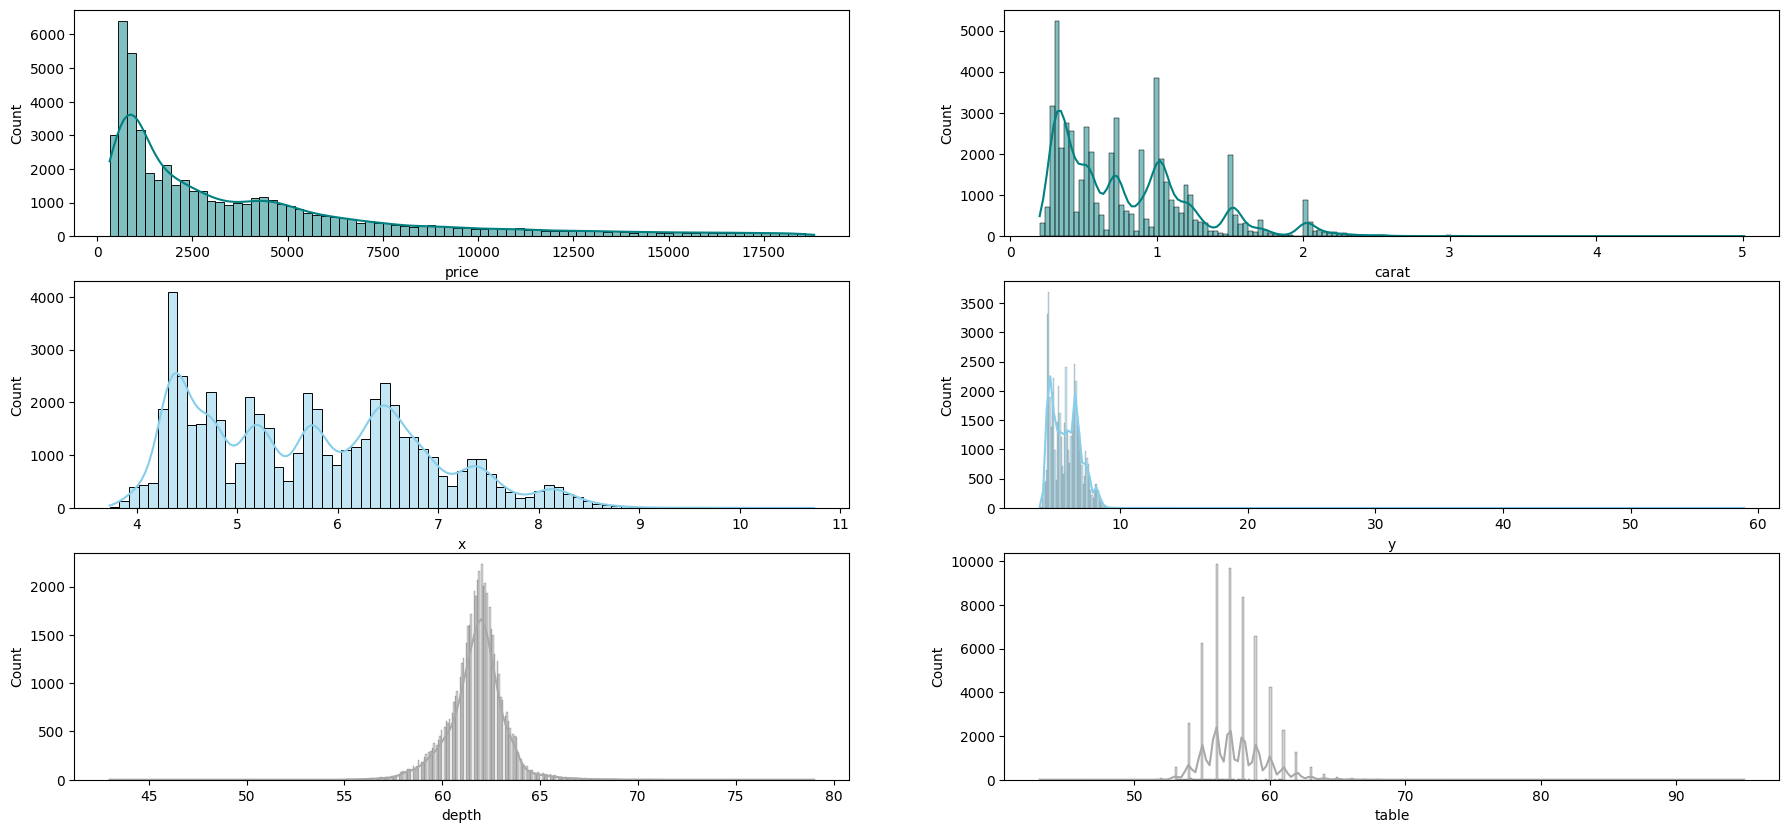

In [10]:
# dimond numerial fields distribution
fig, axs = plt.subplots(3, 2, figsize=(22, 10))
sns.histplot(df['price'], kde=True, color="teal",ax=axs[0, 0])
sns.histplot(df['carat'],kde=True, color="teal",ax=axs[0, 1])
sns.histplot(df['x'],kde=True, color="skyblue",ax=axs[1, 0])
sns.histplot(df['y'],kde=True, color="skyblue",ax=axs[1, 1])
sns.histplot(df['depth'],kde=True, color="darkgrey",ax=axs[2, 0])
sns.histplot(df['table'],kde=True, color="darkgrey",ax=axs[2, 1])
plt.show()

<ipython-input-11-39f00a5ced78>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(ax=axes[0], data=df, x='cut', y='price', palette="RdBu")
<ipython-input-11-39f00a5ced78>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(ax=axes[1], data=df, x='color', y='price', palette="RdBu")
<ipython-input-11-39f00a5ced78>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(ax=axes[2], data=df, x='clarity', y='price', palette="RdBu")


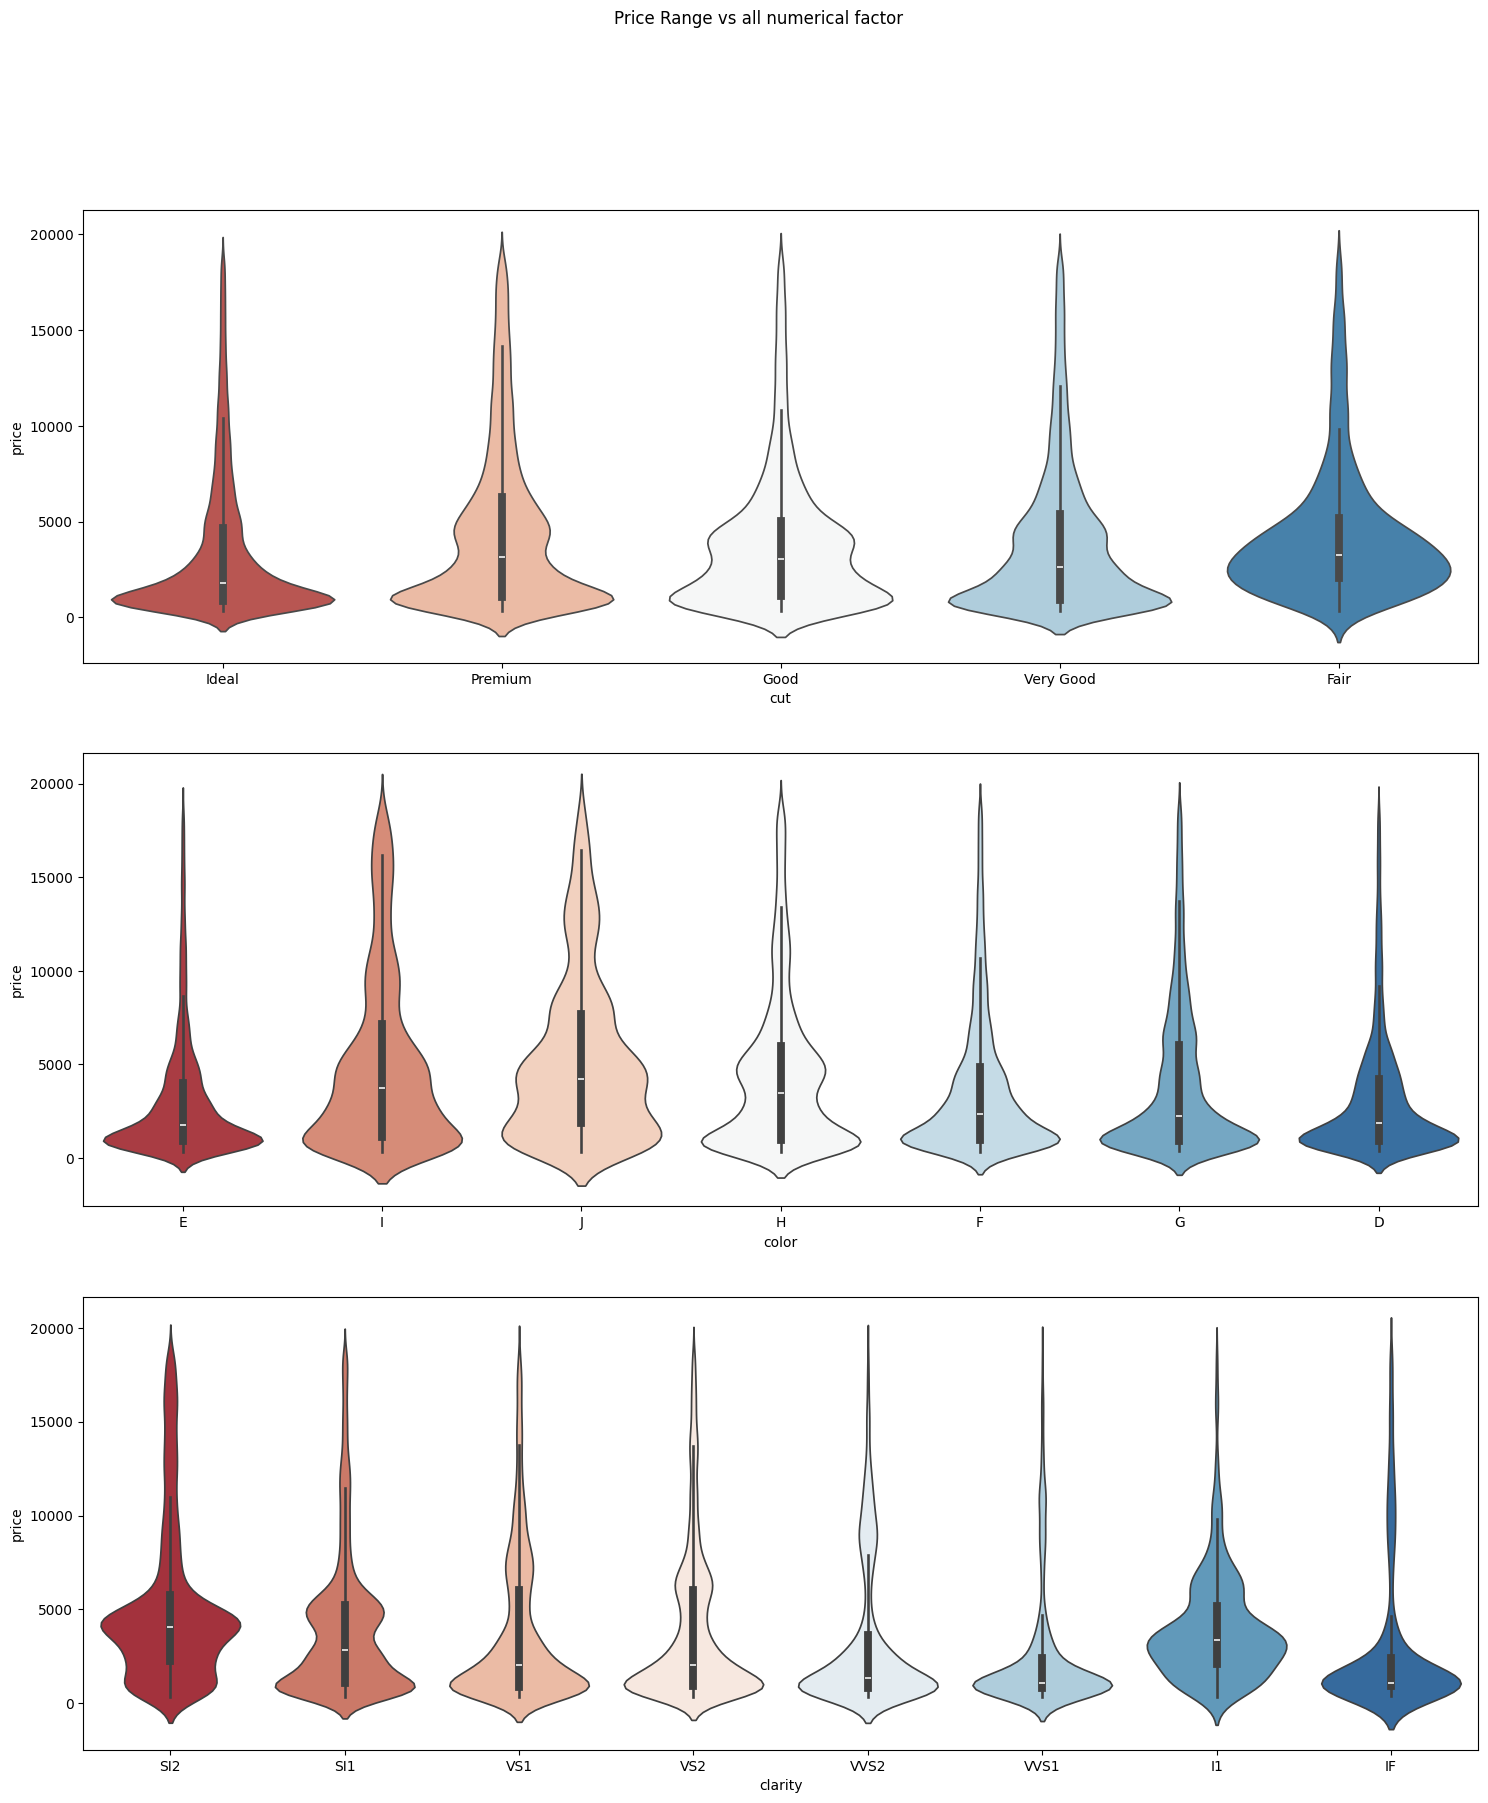

In [11]:

fig, axes = plt.subplots(3, 1, figsize=(18, 20))

fig.suptitle('Price Range vs all numerical factor')

sns.violinplot(ax=axes[0], data=df, x='cut', y='price', palette="RdBu")
sns.violinplot(ax=axes[1], data=df, x='color', y='price', palette="RdBu")
sns.violinplot(ax=axes[2], data=df, x='clarity', y='price', palette="RdBu")

plt.show()

<h3>Heatmap of variable</h3>
Sort variables according to their correlation with price.
<br>There is a strong correlation between the attribute of diamond price and carat, and the length and width of diamond are closely related to the carat of diamond. </br>
<ul>
<li>carat</li>
<li>x</li>
<li>y</li>
<li>z</li>
</ul>

<ipython-input-13-b632ba75d6c5>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr= df. corr()


          carat     depth     table     price         x         y         z
carat  1.000000  0.027889  0.181113  0.921548  0.977857  0.953980  0.961030
depth  0.027889  1.000000 -0.297580 -0.011144 -0.025224 -0.029262  0.094678
table  0.181113 -0.297580  1.000000  0.126666  0.195451  0.183814  0.151683
price  0.921548 -0.011144  0.126666  1.000000  0.887137  0.867685  0.868030
x      0.977857 -0.025224  0.195451  0.887137  1.000000  0.974822  0.975382
y      0.953980 -0.029262  0.183814  0.867685  0.974822  1.000000  0.956623
z      0.961030  0.094678  0.151683  0.868030  0.975382  0.956623  1.000000


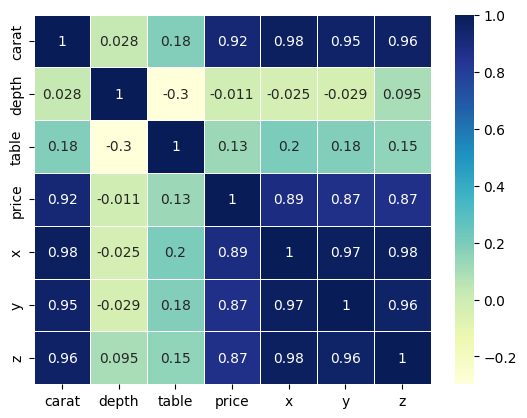

In [13]:
corr= df. corr()
print(corr)
sns.heatmap(corr,annot= True ,linewidths=0.5,cmap= "YlGnBu")
plt.show()

<h3>Analyze the relation of cut, color, clarity and other attributes on the price of diamonds</h3>

<p>Due to the diamond carats in the data set are distributed between 0 and 3 carats, we mainly choose 0-3 carats diamonds as dataset.</p>

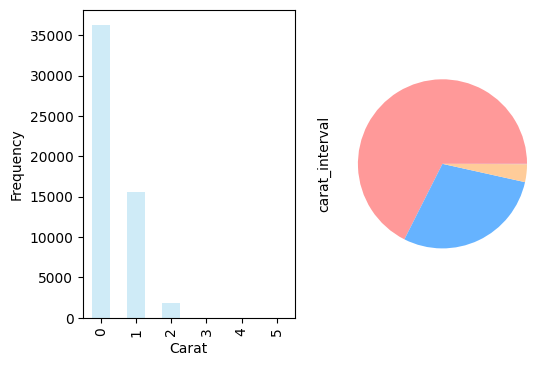

In [19]:

#Setting carat intervals
bins= [0,1,2,3,4,5,6]
label= [ 0,1,2,3,4,5]
df["carat_interval"] = pd.cut(df['carat'], bins=bins, labels=label, right=True)
plt. figure(figsize= (6,4))
# subplot1 - Bar plot
plt.subplot(1, 2, 1)
df_carat_interval_value = df["carat_interval"].value_counts()
df_carat_interval_value.plot.bar(color='#87CEEB', xlabel='Carat', ylabel='Frequency',alpha=0.4)

# subplot2 - Pie plot
plt.subplot(1, 2, 2)
df_carat_interval_value.plot(kind='pie', labels=None, colors=['#FF9999', '#66B3FF', '#FFCC99', '#c2c2f0', '#ffb3e6'])

plt.show()

<h3>Blue for 0-1 carat diamonds, Orange for 1-2 carat diamonds, Green for 2-3. </h3>
<p> Number of colour/clarity/cut that higher is the better.</p>
<ul>
<li>The first sub-chart shows that 30 point and 1 carat diamond rings are the most popular among diamond rings under 2 carats, and assuming this is an objective market data, companies should focus their productivity on 30 point and 1 carat diamond rings.</li>
<li>The second sub-chart shows a skewed distribution, with the majority of people choosing a diamond ring in the 5,000 dollor range, and companies should set a reasonable price range. </li>
<li>The third sub-chart shows the colour of diamonds, with most of the colour of diamonds under 2 carats concentrated above grade 3, but the distribution of 1-2 carat rings is approximately normal, with the highest point at the medium (grade 3), while the colour of diamonds under 1 carat is generally higher than that of 1-2 carat rings, with the highest point of the colour grade at the medium-high (grade 5).</li>
<li>The fourth sub diagram depicts the clarity of the diamond, understanding that high quality clarity is rare, most diamonds have some inclusions, and that clarity is an innate property that cannot be altered by human intervention and therefore cannot be enhanced by human intervention.</li>
<li>The fifth sub-picture depicts the cut of the diamond, which, in contrast to the fourth sub- picture, is a factor that can be interfered with, with the cut of diamonds under two carats mostly distributed in the better areas, most of which are of the highest grades.</li>
<li>The sixth image shows the relationship between carat weight and price for diamonds under two carats. The relationship between carat weight and price is roughly. proportional, but there are other factors that influence the diamond, so we can see that even diamonds that are not dominant in weight can sometimes be overpriced.</li></ul>

In [20]:
# Diamonds below 3 carat as sample, analyse the price influence of each variables
diamond_carat=df[df['carat_interval'] < 3].sort_values('price', ascending=False)

In [21]:
diamond_carat['cut']=diamond_carat['cut'].map({'Ideal':5,'Premium':4,'Very Good':3,'Good':2,'Fair':1})
diamond_carat['color']= diamond_carat['color']. map({'D':6,'E':5,'F':4,'G':3,'H':2,'I':1})
diamond_carat['clarity']= diamond_carat['clarity']. map({'IF':8,'VVS1':7,'VVS2':6,
                                                         'VS1':5,'VS2':4,'SI1':3,'SI2':2,'I1':1})
diamond_carat. drop(['depth','table','x','y','z'],axis= 1,inplace= True )

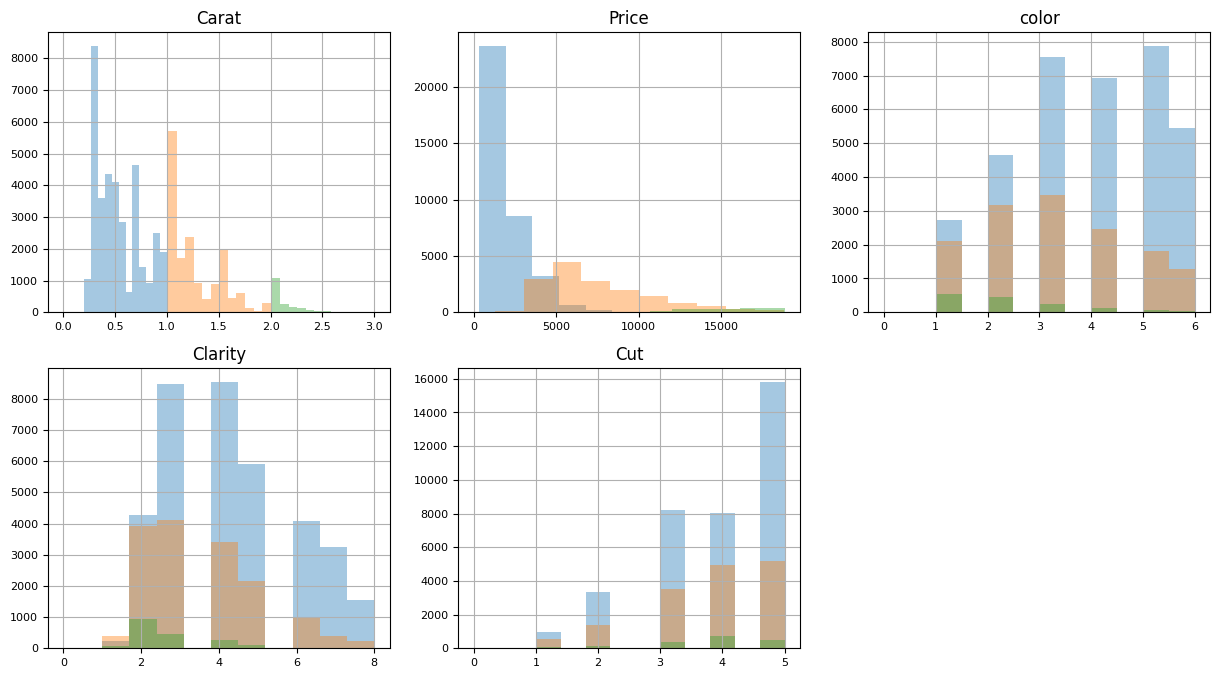

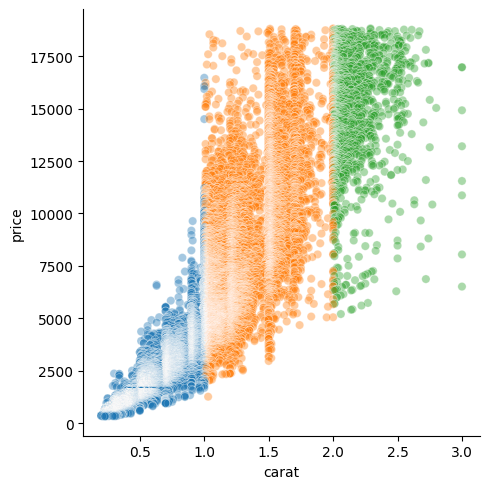

In [25]:
plt. figure(figsize= (15,8))
# setting palette
custom_palette = {"blue": "blue", "red": "red"}


#subplot1
ax1= plt. subplot(231)
ax1. set_title('Carat')
diamond_carat.groupby("carat_interval")['carat'].hist(stacked=True,bins= 12,alpha=0.4)
plt.setp(ax1.get_xticklabels(), fontsize=8)
plt.setp(ax1.get_yticklabels(), fontsize=8)
#subplot2
ax2= plt. subplot(232)
ax2. set_title('Price')
diamond_carat. groupby("carat_interval")['price']. hist(alpha= 0.4)
plt.setp(ax2.get_xticklabels(), fontsize=8)
plt.setp(ax2.get_yticklabels(), fontsize=8)
#subplot3
ax3= plt. subplot(233)
ax3. set_title('color')
diamond_carat. groupby("carat_interval")['color']. hist(alpha= 0.4)
plt.setp(ax3.get_xticklabels(), fontsize=8)
plt.setp(ax3.get_yticklabels(), fontsize=8)
#subplot4
ax4= plt. subplot(234)
ax4. set_title('Clarity')
diamond_carat. groupby("carat_interval")['clarity']. hist(alpha= 0.4)
plt.setp(ax4.get_xticklabels(), fontsize=8)
plt.setp(ax4.get_yticklabels(), fontsize=8)

#subplot5
ax5= plt. subplot(235)
ax5. set_title('Cut')
diamond_carat. groupby("carat_interval")['cut']. hist(alpha= 0.4)
plt.setp(ax5.get_xticklabels(), fontsize=8)
plt.setp(ax5.get_yticklabels(), fontsize=8)
#subplot6
sns.relplot(data=diamond_carat, x = 'carat', y = 'price', hue = 'carat_interval',legend=False, alpha= 0.4)

<h1>Linear Regression</h1>

In [26]:
# transform data format to mechine learning
def LABEL_ENCODING(c1):
    from sklearn import preprocessing
    label_encoder = preprocessing.LabelEncoder()
    df[c1]= label_encoder.fit_transform(df[c1])
    df[c1].unique()
LABEL_ENCODING("cut")
LABEL_ENCODING("color")
LABEL_ENCODING("clarity")
df

,carat,cut,color,clarity,depth,table,price,x,y,z,carat_interval
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43,0
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31,0
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31,0
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63,0
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75,0
...,...,...,...,...,...,...,...,...,...,...,...
53789,0.72,2,0,2,60.8,57.0,2757,5.75,5.76,3.50,0
53790,0.72,1,0,2,63.1,55.0,2757,5.69,5.75,3.61,0
53791,0.70,4,0,2,62.8,60.0,2757,5.66,5.68,3.56,0
53792,0.86,3,4,3,61.0,58.0,2757,6.15,6.12,3.74,0


In [27]:
X = df.drop('price',axis=1)
y = df['price']

In [28]:
from sklearn.model_selection import train_test_split #split the data set
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(43020, 10)
(10755, 10)
(43020,)
(10755,)


In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
linear = LinearRegression()
linear.fit(X_train,y_train)

LinearRegression()

In [33]:
y_test_predict = linear.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test,y_test_predict)))
# Root Mean Squared Error，RMSE.
# Used to measure the size of the model's prediction error
# The smaller the RMSE, the better the prediction performance of the model.
# evaluate accuracy of linearRegression
from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_test_predict)
print("Accuracy: ",r2)

Accuracy:  0.8887973534652991


<h1>Decision Tree</h1>

In [35]:
from sklearn.tree import DecisionTreeRegressor
DTR = DecisionTreeRegressor(max_depth=3)
DTR.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=3)

In [38]:
train_score = DTR.score(X_train,y_train)
text_score = DTR.score(X_test,y_test)
print("Accuracy: ",text_score)

Accuracy:  0.8841342370572554


<h1>RandomForest Regressor</h1>

In [39]:
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor(n_estimators=5,random_state=0)

In [41]:
RF.fit(X_train,y_train)
rf = RF.score(X_train,y_train)
rf_score = RF.score(X_test,y_test)
print("Accuracy: ",rf_score)

Accuracy:  0.9774645734611015
